<a href="https://colab.research.google.com/github/snchimata/airbnb_boston_sentiment_analysis/blob/master/Colab's_New_Code_Editor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

# Airbnb Boston Data Analysis
## Reviews Sentiment Analysis & relationship with Price

### Analysis on price of a listing and dependency on reviews - if yes, how does it varies?


In [2]:
# Import libraries
import io
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
!pip install plotly-express
import plotly_express as px

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

#### Load data

In [3]:
#calender = pd.read_csv("calendar.csv") 
listings = pd.read_csv("listings.csv") 
reviews = pd.read_csv("reviews.csv")

In [4]:
reviews.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  
0  My stay at islam's place was really cool! Good...  
1  Great location for both airport and city - gre...  
2  We really enjoyed our stay at Islams house. Fr...  
3  The room was nice and clean and so were the co...  
4  Great location. Just 5 mins walk from the Airp...

In [5]:
reviews = reviews.dropna()

#### Using built-in analyzer of NLTK library to assign polarity score to each comment to retrieve the 'sentiment' of comments - 'negative', 'neutral', 'positive', and 'compound'.

In [6]:
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sid = SentimentIntensityAnalyzer()
sentiment = reviews['comments'].apply(lambda x : sid.polarity_scores(x))
reviews=pd.concat([reviews,sentiment.apply(pd.Series)],1)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\saiya\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [7]:
# Rounding compond sentiment score
reviews['compound'] = reviews['compound'].round(1)
reviews.head()

listing_id       id        date  reviewer_id reviewer_name  \
0     1178162  4724140  2013-05-21      4298113       Olivier   
1     1178162  4869189  2013-05-29      6452964     Charlotte   
2     1178162  5003196  2013-06-06      6449554     Sebastian   
3     1178162  5150351  2013-06-15      2215611        Marine   
4     1178162  5171140  2013-06-16      6848427        Andrew   

                                            comments  neg    neu    pos  \
0  My stay at islam's place was really cool! Good...  0.0  0.648  0.352   
1  Great location for both airport and city - gre...  0.0  0.639  0.361   
2  We really enjoyed our stay at Islams house. Fr...  0.0  0.767  0.233   
3  The room was nice and clean and so were the co...  0.0  0.673  0.327   
4  Great location. Just 5 mins walk from the Airp...  0.0  0.637  0.363   

   compound  
0       1.0  
1       0.9  
2       1.0  
3       0.9  
4       0.9

In [8]:
reviews[reviews['compound']<-0.25].comments.head(10)

12     Mi estadía en Boston aunque corta fue muy buen...
17     Izzy was great... had clear instructions and n...
24     We didn´t meet Izzy at all!!!! After we arrive...
64     Parking situation was bad.  Very hard to find ...
83     Una casa muy acogedora, muy cerca (a menos de ...
165    L'amfitrió no va contestar cap dels meus e-mai...
213    nothing what I expected !\nwe start from the p...
442    Honestamente, tengo que comentar que lo mejor ...
475    Sean fue un anfitrion muy educado pasamos unas...
486    The listing is accurate. This is a no frills k...
Name: comments, dtype: object

#### Plot Review count by Sentiment score

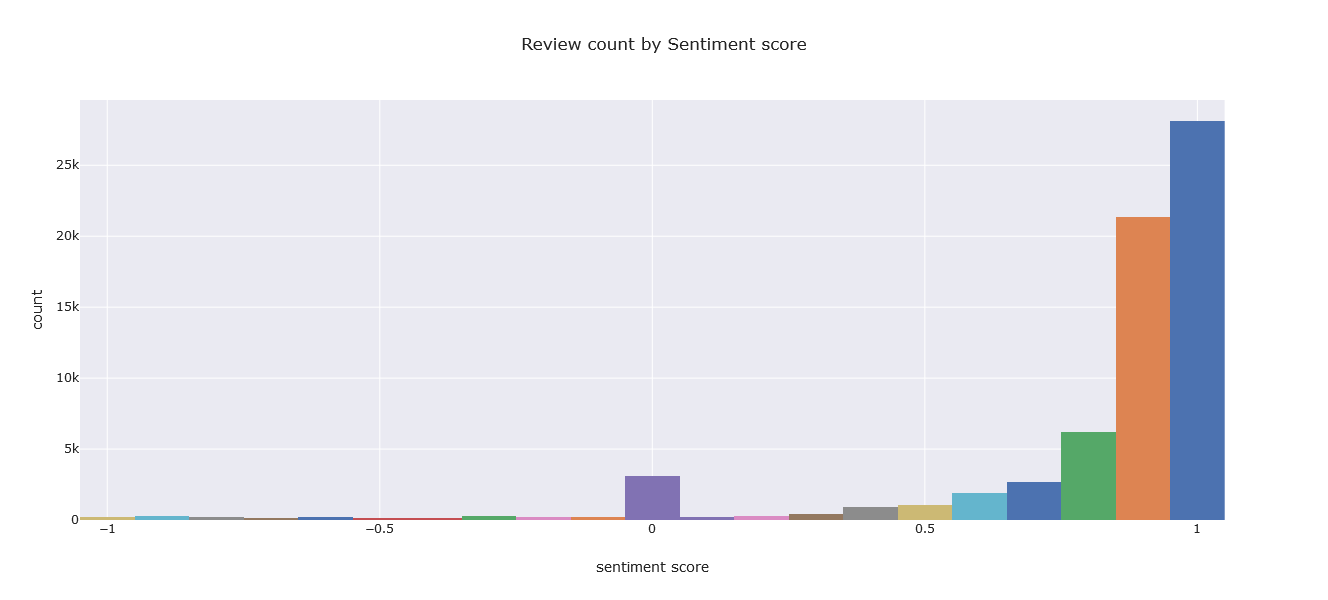

In [9]:
fig = px.histogram(x="compound",data_frame=reviews 
             ,title="Review count by Sentiment score"
             ,color="compound"
             ,template='seaborn'
             ,labels={"compound": "sentiment score"}
             )
fig.update_layout(showlegend=False)

A minimal number of comments were classified as having negative sentiment score. A significant amount of comments were scored exactly with 0.0 sentiment score. Plot shows a moderate number of comments are classified neutral, and a significant amount of comments are classified as positive.
This indicates an overall postive experiences of customers in Boston area with Airbnb offerings.

The number of reviews directly correlates with the number of stays, which depends on various factors like listing start date, how long it is advertised, and various additional factors.
However, it could serve to be useful information to see the correlation between price and the number of reviews. Let us check if there is any relationship between number of reviews, rating and price of listing

#### Plot relation between 'Review scores rating', 'number of reviews' and 'price'

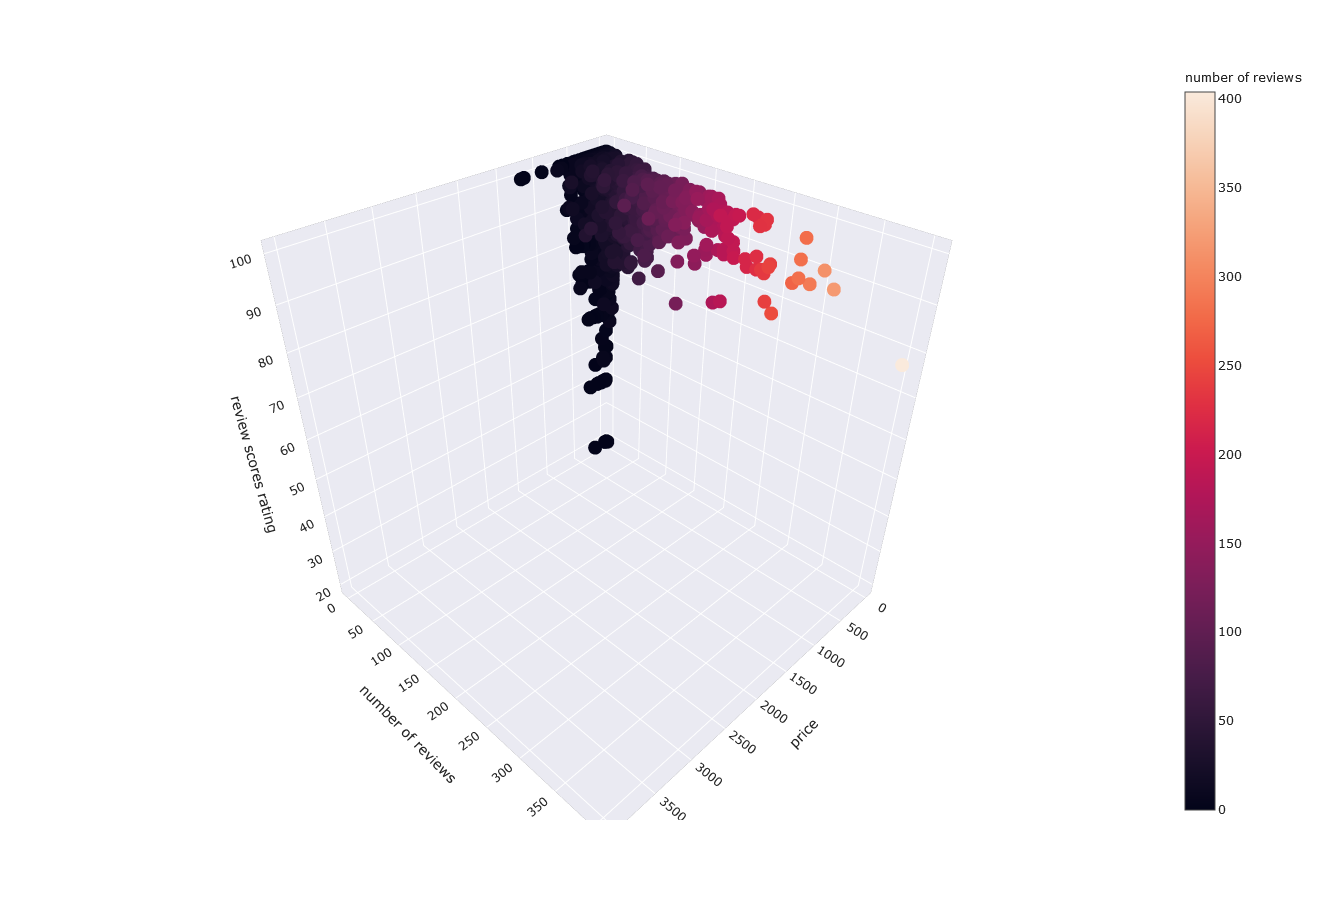

In [10]:
px.scatter_3d(data_frame=listings,x="price"
            ,y="number_of_reviews"
            ,z="review_scores_rating"
            ,color="number_of_reviews"
            ,template='seaborn'
            ,labels={"number_of_reviews": "number of reviews","review_scores_rating": "review scores rating"}
            ,width=1400, height=900,
            )

#### Plot number of reviews by price

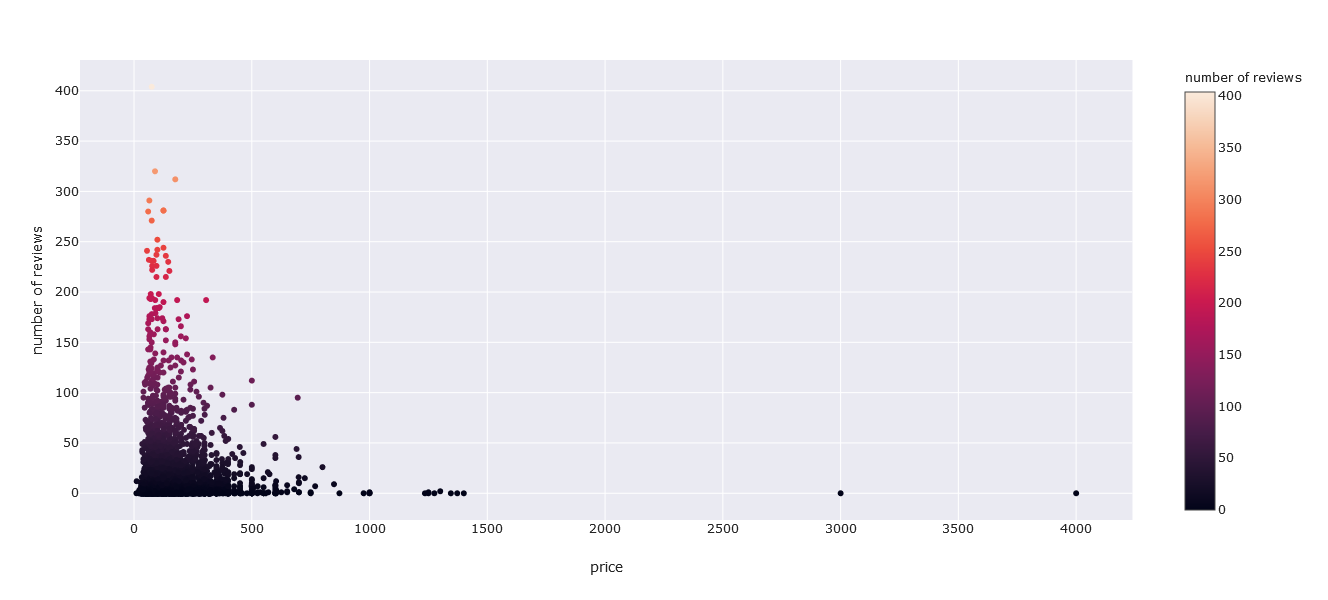

In [11]:
px.scatter(data_frame=listings,x="price"
            ,y="number_of_reviews"
            ,color="number_of_reviews"
            ,template='seaborn'
            ,labels={"number_of_reviews": "number of reviews"},render_mode="svg")

#### Plot number of reviews by review score rating

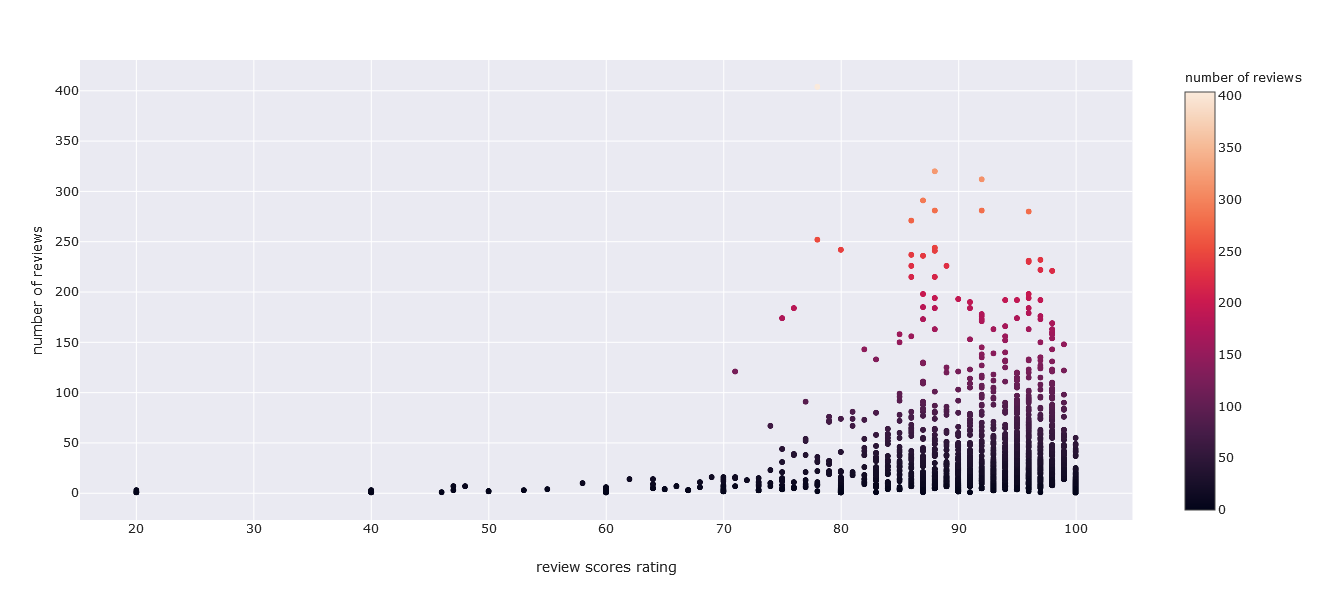

In [12]:
px.scatter(data_frame=listings,
           x="review_scores_rating",
           y="number_of_reviews"
           ,color="number_of_reviews"
           ,template='seaborn'
           ,labels={"number_of_reviews": "number of reviews","review_scores_rating": "review scores rating"})

The plots show that listings with prices range between \$40 and \$400 get the most reviews, probably because of the reasonable price range for larger sections of the customers. Review count quickly declines as the price move in an upward trend, indicating more people book listings that are between \$40–\$400 in prices. Prices in the range \$400 to \$1000 also show a moderate amount of comments indicating the price is not the only factor for a booking. Henceforth Prices and Number of reviews has an inverse relation to an extent after the reasonable price range. Review count decreases with increasing the prices beyond a reasonable range which is directly proportional to the number of bookings. 

3D plots show a high review score rating and the number of reviews are observed with price ranges between \$40–\$400.

#### Most important attributes emphasized by hosts and required to tenants.

In [13]:
!pip install WordCloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [14]:
text = " ".join(review for review in reviews[reviews["compound"] >= 0.8].comments)
print ("There are {} words in the combination of all positive reviews.".format(len(text)))

There are 20915816 words in the combination of all positive reviews.


In [85]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["Lisa", "Sean", "Brian", "Izzy", "Internet Wireless", "Boston"])

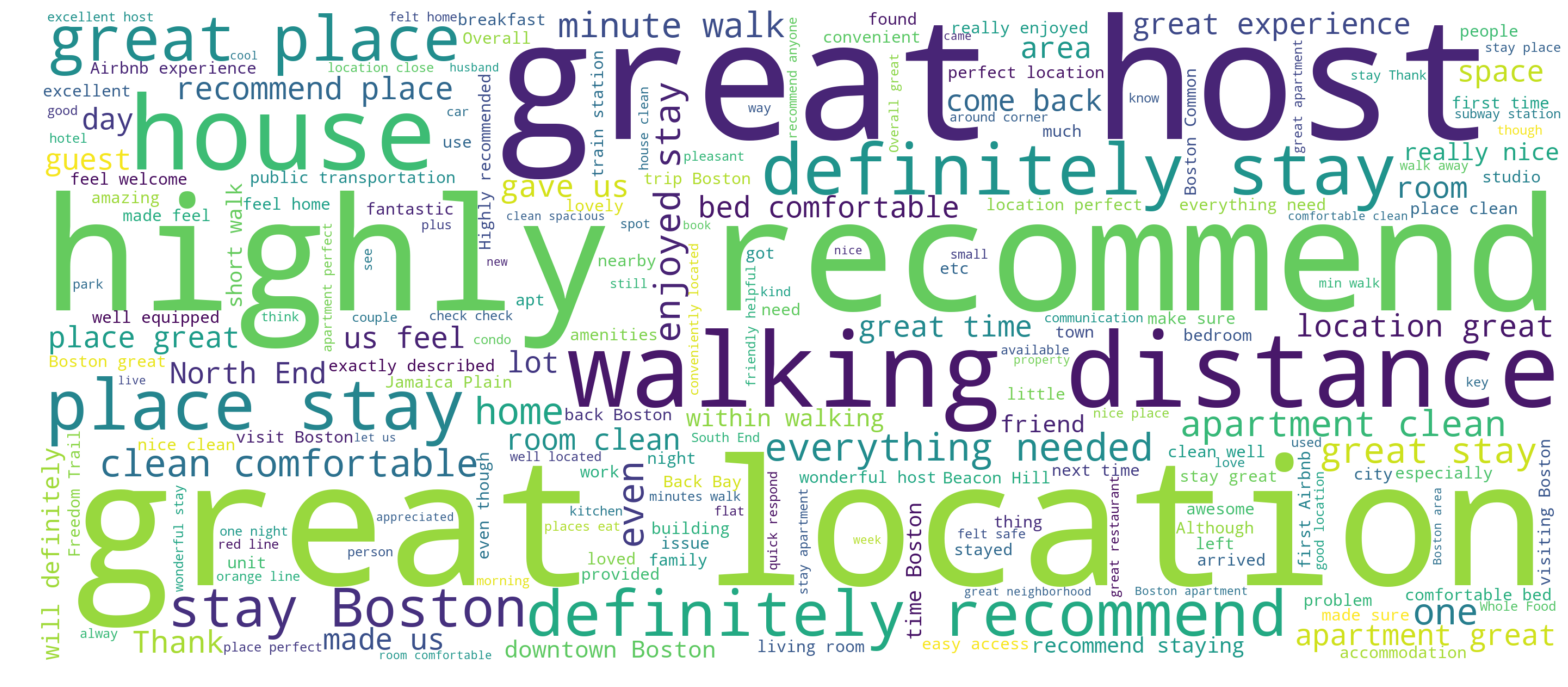

In [57]:
# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width = 2800, height = 1200).generate(text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(28,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the plot, most talked about words are "great location", "great host", "walking distance" and "highly recommended".
Comments with mentioned words helps attain tenants attention. Reviews and comments plays a vital role in attracting the attention of tenants. 

There are 119629 words in the combination of all listings tittle.


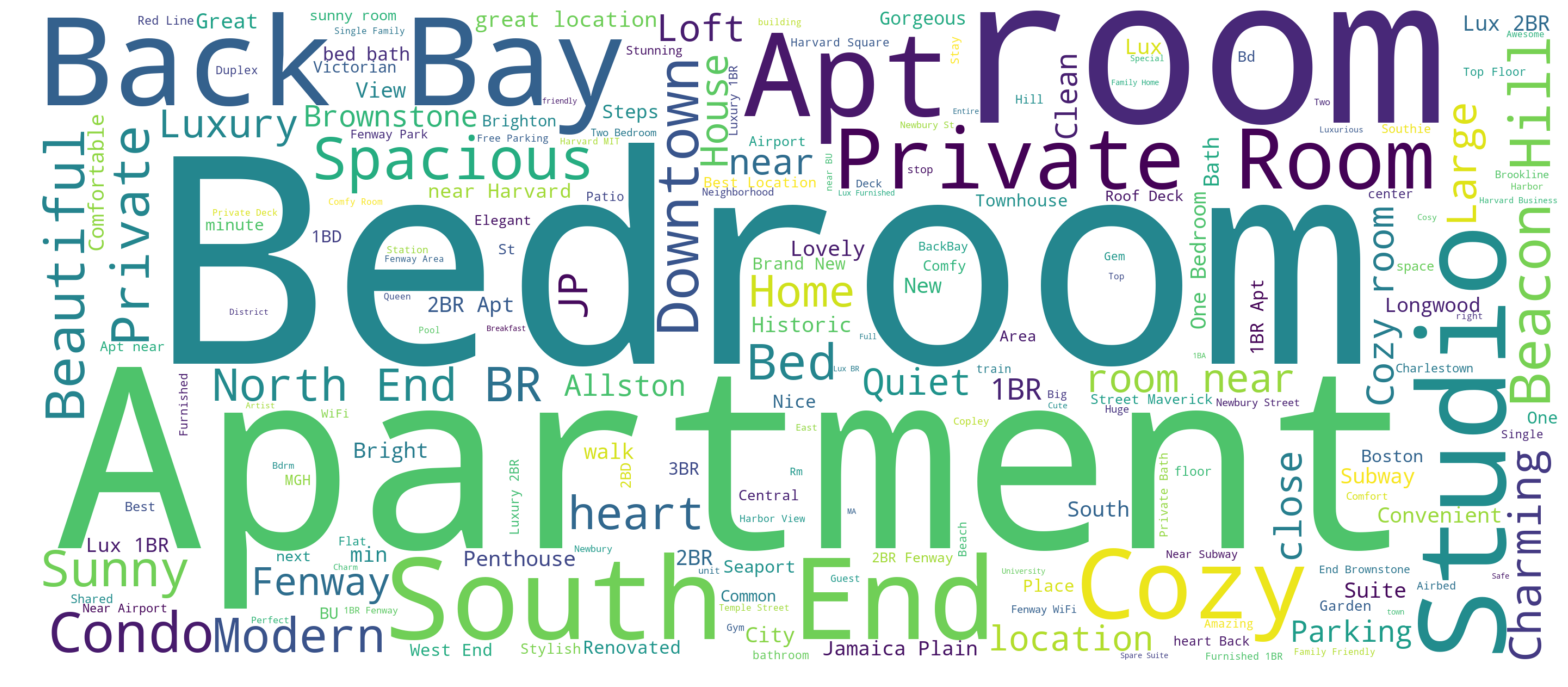

In [60]:
listings_name_text = " ".join(summary for summary in listings.name.astype(str))
print ("There are {} words in the combination of all listings tittle.".format(len(listings_name_text)))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width = 2800, height = 1200).generate(listings_name_text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(28,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the plot, hosts have used terms like "Apartment", "room", "Back Bay", "downtown" to specify location and accommodation type to articulate the attributes of the property.

There are 823904 words in the combination of all listing amenities.


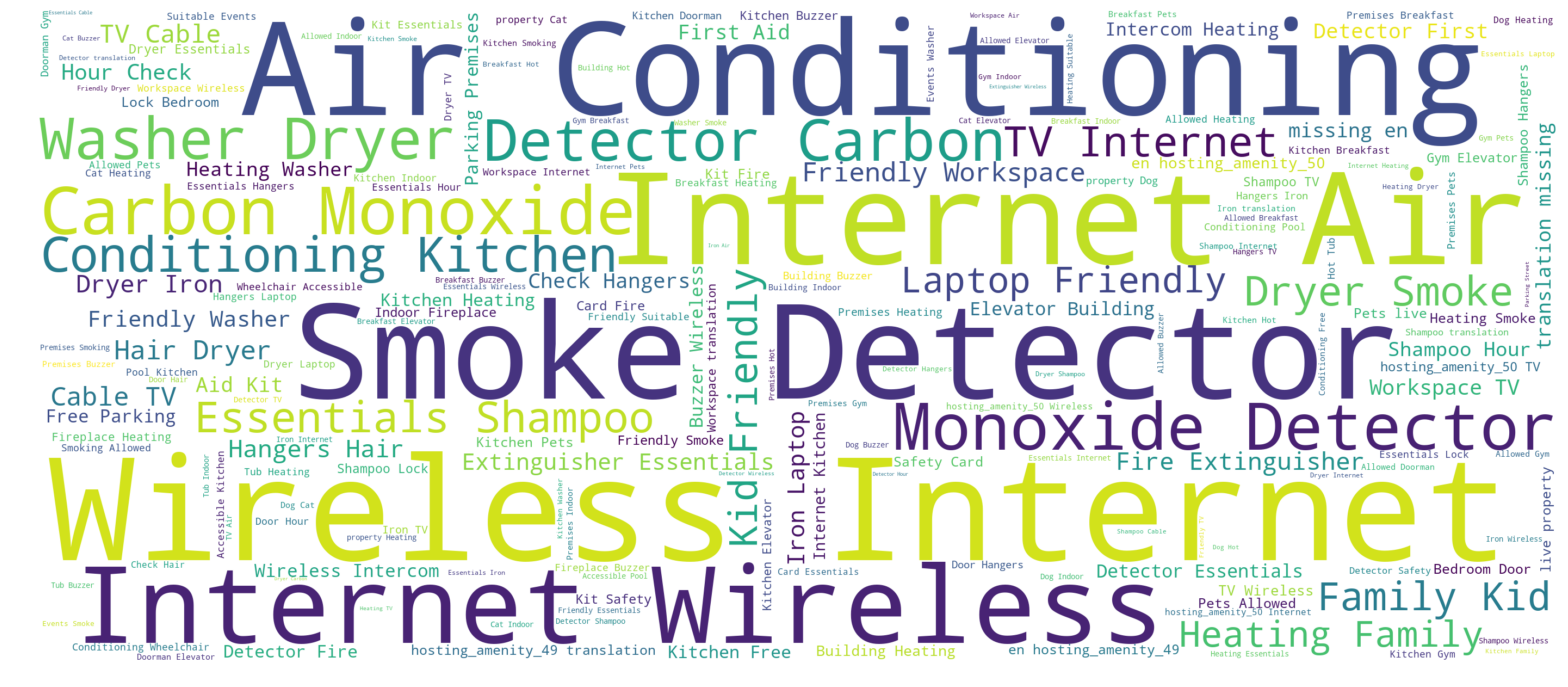

In [86]:
listings_amenities_text = " ".join(summary for summary in listings.amenities.astype(str))
print ("There are {} words in the combination of all listing amenities.".format(len(listings_amenities_text)))

# Generate a word cloud image
wordcloud = WordCloud(stopwords=stopwords, background_color="white",width = 2800, height = 1200).generate(listings_amenities_text)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(28,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

From the plot, Internet, Air Conditioning, Wireless Internet, Smoke Detector are prominent amenities mentioned by the hosts. Additional convenient amenities like Washer, drier, and carbon monoxide detector were also highly cited with increase in price range.

In [19]:
listings.summary.head()

0    Cozy, sunny, family home.  Master bedroom high...
1    Charming and quiet room in a second floor 1910...
2    Come stay with a friendly, middle-aged guy in ...
3    Come experience the comforts of home away from...
4    My comfy, clean and relaxing home is one block...
Name: summary, dtype: object

## Price prediction model and features influence on rental price

#### Feature engineering and explore the data

In [20]:
listings.describe(include='all')

id                           listing_url     scrape_id  \
count   3.585000e+03                                  3585  3.585000e+03   
unique           NaN                                  3585           NaN   
top              NaN  https://www.airbnb.com/rooms/1497879           NaN   
freq             NaN                                     1           NaN   
mean    8.440875e+06                                   NaN  2.016091e+13   
std     4.500787e+06                                   NaN  8.516813e-01   
min     3.353000e+03                                   NaN  2.016091e+13   
25%     4.679319e+06                                   NaN  2.016091e+13   
50%     8.577620e+06                                   NaN  2.016091e+13   
75%     1.278953e+07                                   NaN  2.016091e+13   
max     1.493346e+07                                   NaN  2.016091e+13   

       last_scraped                      name  \
count          3585                      3585   
unique            1                      3504   
top      2016-09-07  Lux 2BR by Fenway w/WiFi   
freq           3585                         8   
mean            NaN                       NaN   
std             NaN                       NaN   
min             NaN                       NaN   
25%             NaN                       NaN   
50%             NaN                       NaN   
75%             NaN                       NaN   
max             NaN                       NaN   

                                                  summary  \
count                                                3442   
unique                                               3113   
top     The unit is stylishly designed for comfort, va...   
freq                                                   21   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                                    space  \
count                                                2528   
unique                                               2268   
top     The studio's kitchenette comes equipped with a...   
freq                                                   17   
mean                                                  NaN   
std                                                   NaN   
min                                                   NaN   
25%                                                   NaN   
50%                                                   NaN   
75%                                                   NaN   
max                                                   NaN   

                                              description experiences_offered  \
count                                                3585                3585   
unique                                               3423                   1   
top     Studio offers the luxury of home furnishings w...                none   
freq                                                    7                3585   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                                                   NaN                 NaN   

                                    neighborhood_overview  ...  \
count      

In [21]:
def dqr(df):
    dq = pd.DataFrame({'VariableNames': df.columns, 
                     'Datatype':df.dtypes,
                     'NoofRecordes': len(df),
                     'UniqueRecords': df.nunique(),
                     'DataAvailable': df.count(),  
                     'MissingCount': df.isnull().sum(),
                     'AvailablePercent': df.count()/len(df),
                     'MissingPercent': df.isnull().sum()/len(df),
                     'Variance': df.var(axis = 0)},index = df.columns)
    dqr = pd.concat([dq,df.describe(include='all').T],axis = 1 )
    dqr.reset_index(drop=True, inplace=True)
    return dqr

In [22]:
# Exploratory data analysis
dqr(listings)

VariableNames Datatype  NoofRecordes  UniqueRecords  \
0                                 id    int64          3585           3585   
1                        listing_url   object          3585           3585   
2                          scrape_id    int64          3585              1   
3                       last_scraped   object          3585              1   
4                               name   object          3585           3504   
5                            summary   object          3585           3113   
6                              space   object          3585           2268   
7                        description   object          3585           3423   
8                experiences_offered   object          3585              1   
9              neighborhood_overview   object          3585           1728   
10                             notes   object          3585           1269   
11                           transit   object          3585           1859   
12                            access   object          3585           1762   
13                       interaction   object          3585           1617   
14                       house_rules   object          3585           1928   
15                     thumbnail_url   object          3585           2986   
16                        medium_url   object          3585           2986   
17                       picture_url   object          3585           3585   
18                    xl_picture_url   object          3585           2986   
19                           host_id    int64          3585           2181   
20                          host_url   object          3585           2181   
21                         host_name   object          3585           1334   
22                        host_since   object          3585           1281   
23                     host_location   object          3585            176   
24                        host_about   object          3585           1240   
25                host_response_time   object          3585              4   
26                host_response_rate   object          3585             52   
27              host_acceptance_rate   object          3585             72   
28                 host_is_superhost   object          3585              2   
29                host_thumbnail_url   object          3585           2174   
..                               ...      ...           ...            ...   
65                   guests_included    int64          3585             13   
66                      extra_people   object          3585             51   
67                    minimum_nights    int64          3585             29   
68                    maximum_nights    int64          3585             85   
69                  calendar_updated   object          3585             38   
70                  has_availability  float64          3585              0   
71                   availability_30    int64          3585             31   
72                   availability_60    int64          3585             61   
73                   availability_90    int64          3585             91   
74                  availability_365    int64          3585            348   
75             calendar_last_scraped   object          3585              1   
76                 number_of_reviews    int64          3585            178   
77                      first_review   object          3585            975   
78                       last_review   object          3585            404   
79              review_scores_rating  float64          3585             48   
80            review_scores_accuracy  float64          3585              8   
81         review_scores_cleanliness  float64          3585              9   
82             review_scores_checkin  float64          3585              8   
83       review_scores_communication  float64          3585              7   
84            review_scores_location  float64

In [23]:
listings.shape

(3585, 95)

In [24]:
listings.isnull().sum().sort_values(ascending=False).head(20)

neighbourhood_group_cleansed    3585
jurisdiction_names              3585
license                         3585
has_availability                3585
square_feet                     3529
monthly_price                   2697
weekly_price                    2693
security_deposit                2243
notes                           1975
interaction                     1554
access                          1489
neighborhood_overview           1415
host_about                      1309
transit                         1290
house_rules                     1192
cleaning_fee                    1107
space                           1057
review_scores_accuracy           823
review_scores_location           822
review_scores_value              821
dtype: int64

In [25]:
# Feature engineering

def clean_percentages(x):
    """ 
    cleans the percentages columns
    transforms data from 20% to 0.20
    """
    x = float(x[:-1])/100
    return x

def clean_zipcode(x):
    """
    cleans the zip code columns & converts zipcode to 5 digits
    """
    x = x[:5]
    return int(x)

In [26]:
columns_to_keep = ['host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
                   'neighbourhood_cleansed', 'zipcode', 'property_type', 'room_type',
                   'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights',
                   'extra_people','security_deposit','host_listings_count','availability_365',
                   'availability_60','availability_90','calculated_host_listings_count','reviews_per_month',
                   'number_of_reviews','review_scores_rating', 'review_scores_accuracy','review_scores_cleanliness', 'review_scores_checkin',
                   'review_scores_communication', 'review_scores_location',
                   'review_scores_value', 'requires_license', 'instant_bookable',
                   'cancellation_policy','cleaning_fee']

In [27]:
listings_X = listings[columns_to_keep].copy()

In [28]:
len(columns_to_keep)

34

In [29]:
# fill columns corresponding to fill_by_mode with their mode values
fill_by_mode = ['zipcode', 'host_response_time','property_type','host_response_rate','host_acceptance_rate']
for fill in fill_by_mode:
    listings_X[fill].fillna(listings_X[fill].mode()[0], inplace=True)

In [30]:
listings_X['zipcode'] = listings_X['zipcode'].apply(lambda x: clean_zipcode(x))

In [31]:
listings_X['host_response_rate'] = listings_X['host_response_rate'].apply(lambda x: clean_percentages(x))

In [32]:
listings_X['host_acceptance_rate'] = listings_X['host_acceptance_rate'].apply(lambda x: clean_percentages(x))

In [33]:
listings_X['price'] = listings_X.price.str.replace('$','').str.replace(',','').astype(float)
listings_X['cleaning_fee'] = listings_X.cleaning_fee.str.replace('$','').str.replace(',','').astype(float)
listings_X['security_deposit'] = listings_X.security_deposit.str.replace('$','').str.replace(',','').astype(float)

In [34]:
# fill columns corresponding to fill_by_mean with their mean values
fill_by_mean = listings_X.select_dtypes(include=['int64', 'float64']).columns[listings_X.select_dtypes(include=['int64', 'float64']).isna().any()].tolist()
for fillmn in fill_by_mean:
    listings_X[fillmn].fillna(listings_X[fillmn].mean(), inplace=True)

In [35]:
# One hot encoding categorical variables
final_data = pd.get_dummies(listings_X,drop_first=True)

In [36]:
# Splitting the dataset into the Training set and Test set
y = final_data[['price']]
X = final_data.drop('price', axis=1)

In [37]:
X.head()

host_response_rate  host_acceptance_rate  zipcode  accommodates  bathrooms  \
0                 1.0                  1.00     2131             4        1.5   
1                 1.0                  1.00     2131             2        1.0   
2                 1.0                  0.88     2131             2        1.0   
3                 1.0                  0.50     2116             4        1.0   
4                 1.0                  1.00     2131             2        1.5   

   bedrooms  beds  minimum_nights  security_deposit  host_listings_count  ...  \
0       2.0   3.0               2        324.698212                    1  ...   
1       1.0   1.0               2         95.000000                    1  ...   
2       1.0   1.0               3        324.698212                    1  ...   
3       1.0   2.0               1        100.000000                    1  ...   
4       1.0   2.0               2        324.698212                    1  ...   

   extra_people_$8.00  extra_people_$80.00  extra_people_$85.00  \
0                   0                    0                    0   
1                   0                    0                    0   
2                   0                    0                    0   
3                   0                    0                    0   
4                   0                    0                    0   

   extra_people_$88.00  extra_people_$89.00  extra_people_$9.00  \
0                    0                    0                   0   
1                    0                    0                   0   
2                    0                    0                   0   
3                    0                    0                   0   
4                    0                    0                   0   

   instant_bookable_t  cancellation_policy_moderate  \
0                   0                             1   
1                   1                             1   
2                   0                             1   
3                   0                             1   
4                   0                             0   

   cancellation_policy_strict  cancellation_policy_super_strict_30  
0                           0                                    0  
1                           0                                    0  
2                           0                                    0  
3                           0                                    0  
4                           0                                    0  

[5 rows x 120 columns]

In [38]:
# Scaling of dependant data variabes
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sscaler = StandardScaler()
scaled_features = sscaler.fit_transform(X.select_dtypes(include=['int64', 'float64']))
scaled_features_df = pd.DataFrame(scaled_features, index=X.index, columns=X.select_dtypes(include=['int64', 'float64']).columns)
X= pd.concat([scaled_features_df,X.select_dtypes(exclude=['int64', 'float64'])], axis =1)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning:

Data with input dtype int64, float64 were all converted to float64 by StandardScaler.



In [39]:
# Scaling of target data variable
mscaler = MinMaxScaler()
y = pd.DataFrame(mscaler.fit_transform(y), columns=y.columns)

In [40]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=88)

### Model and Validation

In [41]:
# Parameters
fit_params={
    "early_stopping_rounds":20, 
    "eval_metric" : 'mae', 
    "eval_set" : [(X_test,y_test)],
    'eval_names': ['valid'],
    'verbose': 1000
}

In [42]:
# Model - Light gradient boosting
import lightgbm as lgb
# instantiate model
clf = lgb.LGBMRegressor(num_leaves= 200, max_depth=10, 
                         random_state=88,
                         colsample_bytree=0.5,
                         subsample=0.75,
                         silent=True, 
                         metric='mae', 
                         n_jobs=-1, 
                         n_estimators=10000,
                         
                         learning_rate=0.001)

# Traning the model
clf.fit(X_train, y_train, **fit_params)


Training until validation scores don't improve for 20 rounds.
[1000]	valid's l1: 0.0143474
[2000]	valid's l1: 0.0118352
[3000]	valid's l1: 0.0110864
[4000]	valid's l1: 0.0108075
Early stopping, best iteration is:
[4877]	valid's l1: 0.0107057


LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=0.5,
       importance_type='split', learning_rate=0.001, max_depth=10,
       metric='mae', min_child_samples=20, min_child_weight=0.001,
       min_split_gain=0.0, n_estimators=10000, n_jobs=-1, num_leaves=200,
       objective=None, random_state=88, reg_alpha=0.0, reg_lambda=0.0,
       silent=True, subsample=0.75, subsample_for_bin=200000,
       subsample_freq=0)

In [43]:
# predicting X_test
y_pred = clf.predict(X_test)

In [44]:
# metrics
mae = mean_absolute_error(y_pred,y_test)
mse = mean_squared_error(y_pred,y_test)
rmse = np.sqrt(mean_squared_error(y_pred,y_test))
r2 = r2_score(y_pred,y_test)

In [45]:
# print
print('Mean absolute error: ',mae)
print('Mean squared error: ',mse)
print('Root mean squared error: ',rmse)
print('R2 Score: ',r2)

Mean absolute error:  0.010705744225450814
Mean squared error:  0.0003658759039626763
Root mean squared error:  0.01912788289285242
R2 Score:  0.31844670898966987


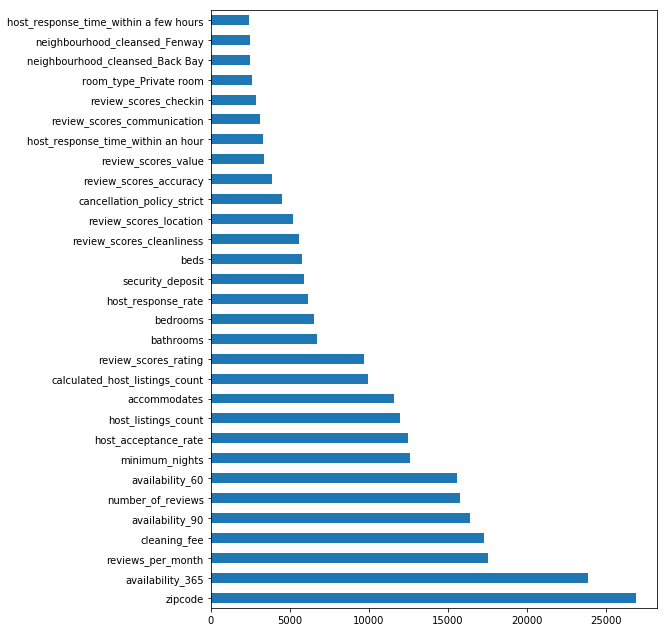

In [46]:
# Plotting features by importance
feat_imp = pd.Series(clf.feature_importances_, index=X.columns)
feat_imp.nlargest(30).plot(kind='barh', figsize=(8,11))

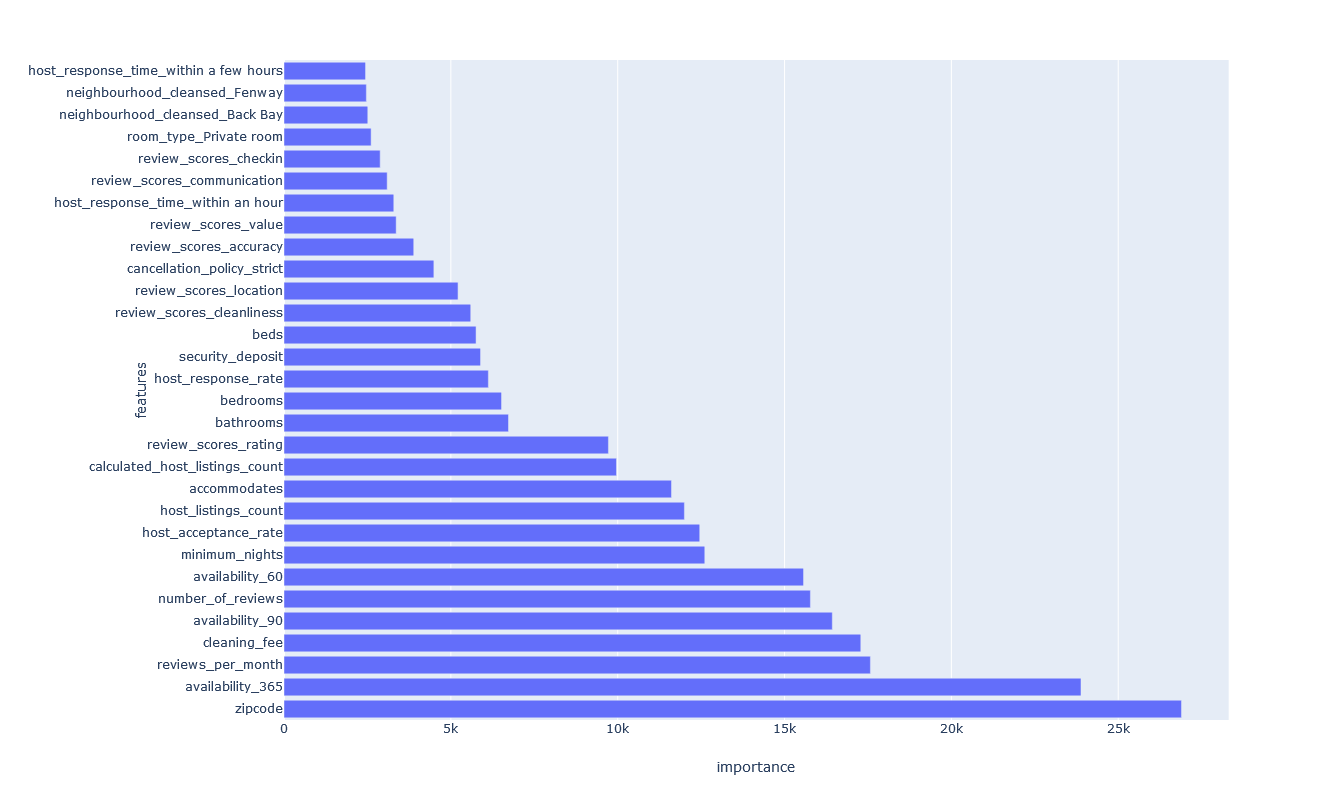

In [47]:
#plt.figure(figsize=(28,22))
px.bar(pd.DataFrame(feat_imp).reset_index().rename(columns={0:'importance','index':'features'}).sort_values('importance', ascending=False).head(30)
       ,x = 'importance', y = 'features',orientation='h',width=1600, height=800)

Plotted top 30 features which play a vital role in driving rental price.

It is no surprise that zipcode is one of the top important features, as rental price highly depends on the location of the property. Reviews_per_month and number_of_reviews provide information on property bookings and guests satisfaction rate. Some other features such as availability,  cleaning_fee, minimum_nights, host_acceptance_rate and accommodates are also among the important feature list.

In [48]:
#from plotly.offline import plot
#plot(fig, filename="/test", auto_open=False)